# Prediction using Unsupervised Learning

# Shree Narayan Teli

In [1]:
# Importing the necessary libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
# Loading the csv dataset using Pandas framework and read five rows

iris = pd.read_csv('iris.csv')
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
# Here we have printed five rows using head method

iris.shape

(150, 6)

In [4]:
# we have printed the datatypes and checked that is there any null values present in the dataset or not.

iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
# Printing the number of unqiue values contains the column Species

iris['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [6]:
# Converting categorical dataset into numerical by using replace method (Data Preprocessing)

iris['Species'].replace({'Iris-setosa':1, 'Iris-versicolor':2, 'Iris-virginica':3}, inplace=True)

In [7]:
iris['Species'].unique()

array([1, 2, 3], dtype=int64)

In [8]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,1
1,2,4.9,3.0,1.4,0.2,1
2,3,4.7,3.2,1.3,0.2,1
3,4,4.6,3.1,1.5,0.2,1
4,5,5.0,3.6,1.4,0.2,1


In [9]:
# Dropping Id and Species column from dataset

x = iris.drop(['Id','Species'], axis=1)
x.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [30]:
# WCSS = Within Clusters Sum of Squares
# Finding WCSS values to determine actual number of clusters required

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=5)
    kmeans.fit(x)
    
    wcss.append(kmeans.inertia_)

C:\Users\shree\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


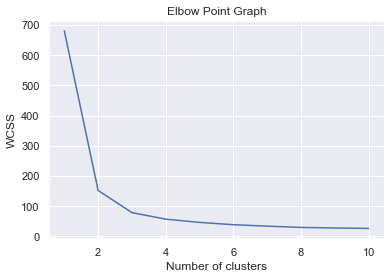

In [31]:
# Plotting Elbow grap and finding the actual number of clusters required

sns.set()
plt.plot(range(1,11), wcss)
plt.title('Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
# Fitting our dataset with Kmeans clustring model with 3 number of clusters

kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)
Y = kmeans.fit_predict(x)
x=x.values

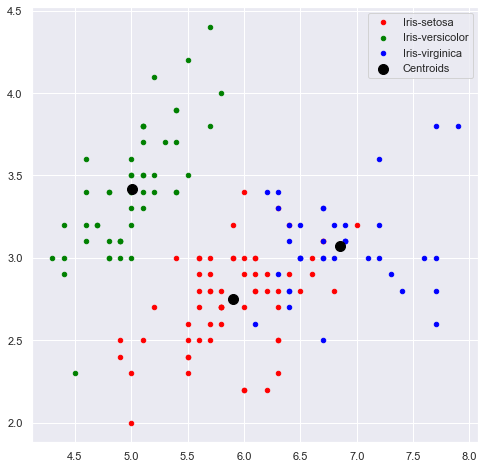

In [35]:
# Predicting 

plt.figure(figsize=(8,8))
plt.scatter(x[Y==0, 0], x[Y==0, 1], s =20, c ='red', label='Iris-setosa')
plt.scatter(x[Y==1, 0], x[Y==1, 1], s =20, c ='green', label='Iris-versicolor')
plt.scatter(x[Y==2, 0], x[Y==2, 1], s =20, c ='blue', label='Iris-virginica')

plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           s=100, c='black', label="Centroids")
plt.legend()
plt.show()